In [65]:
# load packages 
import pandas as pd
import Bio as Bio
from Bio import SeqIO
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# define the directory containing the Genbank files
directory = "antismash_gbk_files/antismash_out_renamed/"

# initialise a empty list to store records from matching files
all_records = []
'''
extract information from protocluster feature in genbank file 
1. for each record in the genbank file iterature through the features using "for feature in record.features" 
2. inside the loop check if the feature type is "protocluster" using if feature.type in ["protocluster"]: 
3. if TRUE, make a dictionary named "feature_info" to store information 
4. extract information using feature.qualifiers.get method associated to each Genbank feature 
5. after extracting information, append to a list called "records" 
6. Create dataframe 

'''

# iterate through each file in the directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    
    # check if region in the filename - ignores full gbk files in the directory 
    if "region" in filename: 

        # initialise records for the current file    
        records = []

        for record in SeqIO.parse(filepath, "genbank"):
            for feature in record.features:
                if feature.type in ["protocluster"]: 
                    feature_info = {
                        "aStool": feature.qualifiers.get("aStool", "Unknown")[0],
                        "Location": str(feature.location),
                        "category": feature.qualifiers.get("category", "Unknown")[0],
                        "contig_edge": feature.qualifiers.get("contig_edge", "Unknown")[0],
                        "core_location": feature.qualifiers.get("core_location", "Unknown")[0],
                        "cutoff": feature.qualifiers.get("cutoff", "Unknown")[0],
                        "detection_rule": feature.qualifiers.get("detection_rule", "Unknown")[0],
                        "product": feature.qualifiers.get("product", "Unknown")[0],
                        "protocluster_number": feature.qualifiers.get("protocluster_number", "Unknown")[0],
                        "tool": feature.qualifiers.get("tool", "Unknown")[0],
                        "filename": filename,
                    }   
                elif feature.type in ["cand_cluster"]: 
                    feature_kind = {
                        "kind": feature.qualifiers.get("kind", "Unknown")[0],
                        "filename": filename,
                    }
                    records.append(feature_info)
                    records.append(feature_kind)
        all_records.extend(records)

antismash_df = pd.DataFrame(all_records)
antismash_df

,aStool,Location,category,contig_edge,core_location,cutoff,detection_rule,product,protocluster_number,tool,filename,kind
0,rule-based-clusters,[0:14429](+),other,False,[355094:359523],20000,IucA_IucC,siderophore,1,antismash,USMM053_contigs.fa_antismashcontig00004.region...,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USMM053_contigs.fa_antismashcontig00004.region...,single
2,rule-based-clusters,[0:43858](+),NRPS,False,[364699:368557](+),20000,cds(Condensation and (AMP-binding or A-OX)),NRPS,1,antismash,MMO-94_contigs.fa_antismashcontig00004.region0...,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMO-94_contigs.fa_antismashcontig00004.region0...,single
4,rule-based-clusters,[0:20279](+),RiPP,False,[618083:618362](-),10000,"minimum(1, [Bottromycin_Methyltransferase_RRE,...",RRE-containing,1,antismash,AS170_contigs.fa_antismashcontig00002.region00...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USHLN04_contigs.fa_antismashcontig00003.region...,single
5418,rule-based-clusters,[0:41215](+),PKS,False,[60551:61766](-),20000,(Chal_sti_synt_C or Chal_sti_synt_N),T3PKS,1,antismash,USMM236_contigs.fa_antismashcontig00002.region...,NaN
5419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USMM236_contigs.fa_antismashcontig00002.region...,single
5420,rule-based-clusters,[0:20705](+),other,False,[50785:51490](+),20000,Autoind_synth,hserlactone,1,antismash,MMO-151_contigs.fa_antismashcontig00008.region...,NaN


In [137]:
'''
merge rows where filenames match - removes NaN rows when extracting protocluster information 
merges values from "kind" i.e the protocluster information into final df
'''

antismash_df_clean = antismash_df.groupby('filename').agg({
    'aStool': 'first',
    'Location': 'first',
    'category': 'first',
    'contig_edge': 'first',
    'core_location': 'first',
    'cutoff': 'first',
    'detection_rule': 'first',
    'product': 'first',
    'protocluster_number': 'first',
    'tool': 'first',
    'kind': 'first'
}).reset_index()

antismash_df_clean

,filename,aStool,Location,category,contig_edge,core_location,cutoff,detection_rule,product,protocluster_number,tool,kind
0,AA010_contigs.fa_antismashcontig00001.region00...,rule-based-clusters,[0:33999](+),NRPS,False,[51684:55683](+),5000,(AMP-binding and PP-binding and TIGR02353),NAPAA,1,antismash,single
1,AA010_contigs.fa_antismashcontig00001.region00...,rule-based-clusters,[0:18418](+),other,False,[701157:709575],20000,IucA_IucC,siderophore,1,antismash,single
2,AA010_contigs.fa_antismashcontig00001.region00...,rule-based-clusters,[0:22191](+),RiPP,False,[1198050:1200241],20000,(cds(PF04055 and (TIGR04085 or SPASM)) and (TI...,redox-cofactor,1,antismash,neighbouring
3,AA010_contigs.fa_antismashcontig00003.region00...,rule-based-clusters,[0:29080](+),other,False,[125722:134802],10000,(HMGL-like and AMP-binding),betalactone,1,antismash,single
4,AA010_contigs.fa_antismashcontig00004.region00...,rule-based-clusters,[0:43603](+),other,False,[351433:355036],20000,(APE_KS1 or APE_KS2),arylpolyene,1,antismash,single
...,...,...,...,...,...,...,...,...,...,...,...,...
2424,VD8_contigs.fa_antismashcontig00249.region001_...,rule-based-clusters,[0:6292](+),RiPP,True,[1850:2678],20000,(mvd or mvnA),microviridin,1,antismash,single
2425,VD8_contigs.fa_antismashcontig00256.region001_...,rule-based-clusters,[0:6078](+),other,True,[793:4725],20000,(APE_KS1 or APE_KS2),arylpolyene,1,antismash,single
2426,VD9_contigs.fa_antismashcontig00006.region001_...,rule-based-clusters,[0:46348](+),PKS,False,[156957:163305](+),20000,cds(PKS_AT and (PKS_KS or ene_KS or mod_KS or ...,T1PKS,1,antismash,single
2427,VD9_contigs.fa_antismashcontig00007.region001_...,rule-based-clusters,[0:22098](+),RiPP,False,[132905:135003],20000,(cds(PF04055 and (TIGR04085 or SPASM)) and (TI...,redox-cofactor,1,antismash,single


In [148]:
# split the filename into separate columns 
'''
clean the dataframe - split up the filename column into a "sampleID" column, contig and region 
 - use these values to aggregate
'''
antismash_df_clean[['sampleID', 'junk', 'contigsandregion', 'junk2', 'junk3', 'fileext']] = antismash_df_clean['filename'].str.split('_', expand=True)
antismash_df_clean[['contignumber', 'regionnumber']] = antismash_df_clean['contigsandregion'].str.split('.', expand=True)
antismash_df_clean["contignumber"] = antismash_df_clean["contignumber"].str.replace("antismash", "")
antismash_df_clean2 = (antismash_df_clean[['sampleID', 'contignumber', 'regionnumber', 
                              'category', 'contig_edge', 'core_location', 
                              'cutoff', 'detection_rule', 'product', 
                              'protocluster_number', 'kind']])

antismash_df_clean2

# write this to a CSV file 
antismash_df_clean2.to_csv("260923_antismash_protoclusters_MosAIC", sep = ",", index=False, encoding="utf-8")
   

#### Info 
We now have a clean dataset we can work with. QC questions I am interested in answering: 
- How many BGCs are located on a contig edge? 
- How many BGCs have we identified in MosAIC? 
- How many different products have we identified? 
    - What is the distribution? 

In [146]:
agg_contig_edge = (antismash_df_clean2[['sampleID', 'contig_edge']]
                   .groupby(['contig_edge'])
                   .count()
                   .reset_index())

agg_contig_edge



,contig_edge,sampleID
0,False,2054
1,True,374


#### Info 
394 BGCs are located on a contig edge. 2261 are not located on the contig edge. 
Ask Eva - should we filter these out? I think we should. 

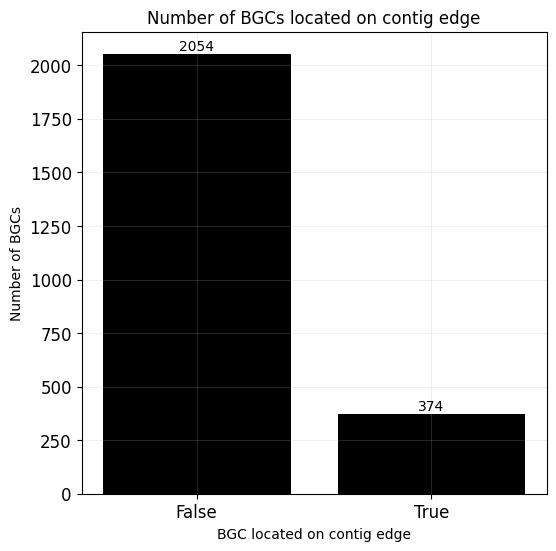

In [140]:
# find how many of the protoclusters are on a contig edge 
agg_contig_edge = (antismash_df_clean[['sampleID', 'contig_edge']]
                   .groupby(['contig_edge'])
                   .count()
                   .reset_index())

plt.figure(figsize=(6, 6))  # Set the figure size

# Adding labels and title
plt.xlabel('BGC located on contig edge')  # X-axis label
plt.ylabel('Number of BGCs')  # Y-axis label
plt.title('Number of BGCs located on contig edge')  # Title of the graph

# Adjust ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='-', alpha=0.2)

for i, v in enumerate(agg_contig_edge['sampleID']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.bar(x = agg_contig_edge['contig_edge'], height = agg_contig_edge['sampleID'], color='black')  # Create the bar chart

plt.savefig("031023_BGCs_on_contig_edge.png", dpi = 600, bbox_inches = 'tight')


##### Summarise products 
Question: Summarise the predicted BGC products in MosAIC 

Answer: 

In [141]:
# group by products
products_summarised = antismash_df_clean[['product', 'sampleID']].groupby('product').count().reset_index().sort_values(by = 'sampleID')
products_summarised.head()


,product,sampleID
41,thioamide-NRP,1
31,phenazine,1
29,oligosaccharide,1
23,lanthipeptide-class-iv,1
38,sactipeptide,2


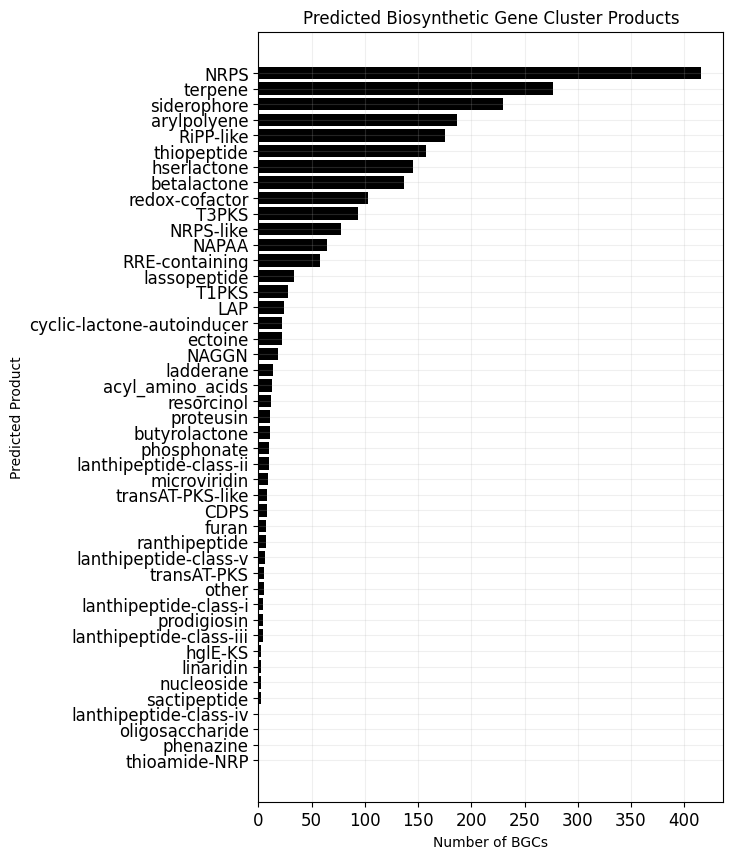

In [142]:
# plot 
plt.figure(figsize=(6, 10))  # Set the figure size

# Adding labels and title
plt.xlabel('Number of BGCs')  # X-axis label
plt.ylabel('Predicted Product')  # Y-axis label
plt.title('Predicted Biosynthetic Gene Cluster Products')  # Title of the graph

# Adjust ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='-', alpha=0.2)

plt.barh(y = products_summarised['product'], width = products_summarised['sampleID'], color='black')  # Create the bar chart


plt.savefig("091023_BGCs_predicted_BGC_products.png", dpi = 600, bbox_inches = 'tight')

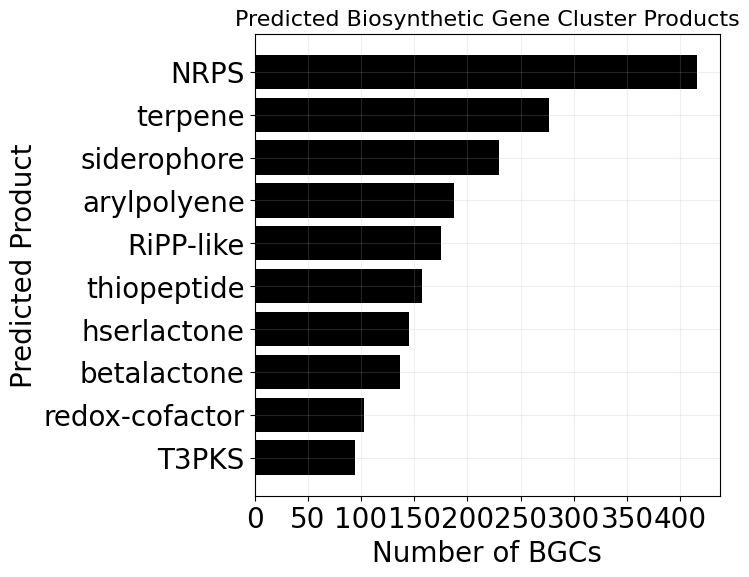

In [143]:
# filter for top 10 products and plot 
products_summarised_top_ten = products_summarised.tail(10)

# plot 
plt.figure(figsize=(6, 6))  # Set the figure size

# Adjust ticks and grid
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', linestyle='-', alpha=0.2)
plt.title("Predicted Biosynthetic Gene Cluster Products", fontsize=16)  # Change the title font size
plt.xlabel("Number of BGCs", fontsize=20)  # Change the x-axis label font size
plt.ylabel("Predicted Product", fontsize=20) 

plt.barh(y = products_summarised_top_ten['product'], width = products_summarised_top_ten['sampleID'], color='black')  # Create the bar chart


plt.savefig("091023_TopTen_BGC_products.png", dpi = 600, bbox_inches = 'tight')

In [56]:
products_summarised_top_ten

,product,sampleID
5,NRPS-like,103
37,redox-cofactor,106
13,betalactone,146
43,thiopeptide,159
19,hserlactone,170
12,arylpolyene,200
8,RiPP-like,213
40,siderophore,237
41,terpene,283
4,NRPS,461


##### Product and Category
Group the data into category and product - what do you notice

In [84]:
category_and_product = antismash_df_clean[['sampleID', 'category', 'product']].groupby(['category', 'product']).count().reset_index()
category_and_product.to_csv("091023_antismash_category_and_product_MosAIC", sep = ",", index=False, encoding="utf-8")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

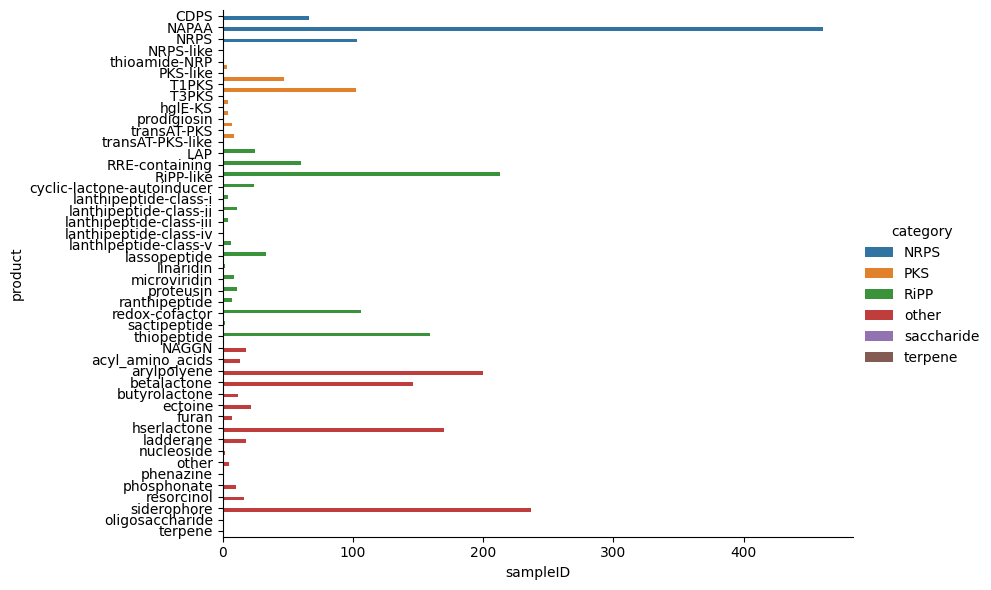

In [83]:
sns.catplot(x="sampleID", y="product", hue="category", data=category_and_product, kind="bar", height=6, width = 2, aspect=1.5)

##### Contig Region 
Group the data into the BGC regions
- 2055 BGCs are situated on a contig without another BGC
- 410 BGCs are shared on a contig 

In [145]:
regionnumber = antismash_df_clean2[['regionnumber', 'sampleID']].groupby('regionnumber').count().reset_index()

regionnumber.to_csv("091023_regionnumber.csv", sep = ",", index=False, encoding="utf-8")

regionnumber


,regionnumber,sampleID
0,region001,1890
1,region002,362
2,region003,114
3,region004,38
4,region005,17
5,region006,5
6,region007,3


In [153]:
candidatecluster_info = antismash_df_clean2[['sampleID', 'kind']].groupby('kind').count().reset_index()
candidatecluster_info.to_csv("091023_candidatecluster_info.csv", sep = ",", index=False, encoding="utf-8")
candidatecluster_info

,kind,sampleID
0,chemical_hybrid,15
1,interleaved,29
2,neighbouring,153
3,single,2232
